In [51]:
import numpy as np
import pandas as pd

In [87]:
data = pd.read_csv('titanic_test.csv')

In [88]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [90]:
import seaborn as sns
sns.set()

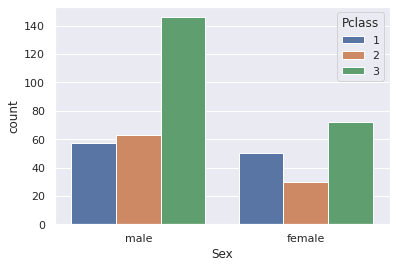

In [93]:
sns.countplot(x=data['Sex'], hue=data['Pclass'])

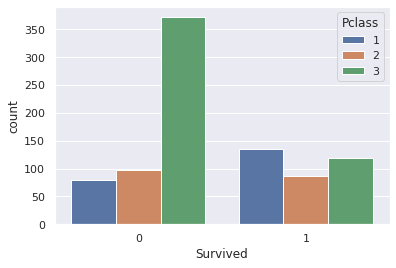

In [57]:
sns.countplot(x=data['Survived'],hue=data['Pclass'],data=data)

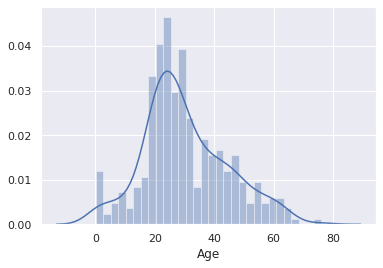

In [94]:
sns.distplot(data['Age'],bins=30)

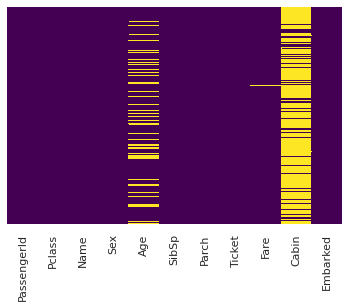

In [95]:
sns.heatmap(data.isnull(),cbar=False, yticklabels=False,cmap='viridis')

In [96]:
data['Age']

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

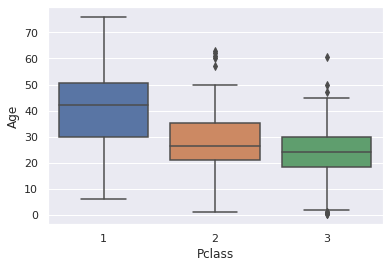

In [97]:
sns.boxplot(y='Age',x='Pclass',data=data)

In [98]:
def removeNanAge(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 43
        elif pclass == 2:
            return 27
        elif pclass == 3:
            return 25
        else:
            return 30
    else:
        return age
        

In [99]:
data['Age'] = data[['Age','Pclass']].apply(removeNanAge,axis=1)

In [100]:
data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Name: Age, Length: 418, dtype: bool

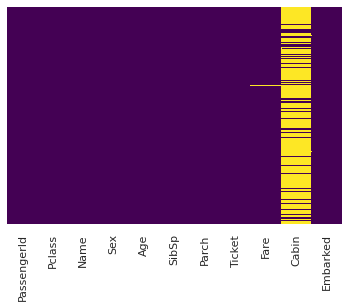

In [101]:
sns.heatmap(data.isnull(),cbar=False, yticklabels=False,cmap='viridis')

In [102]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

In [103]:
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


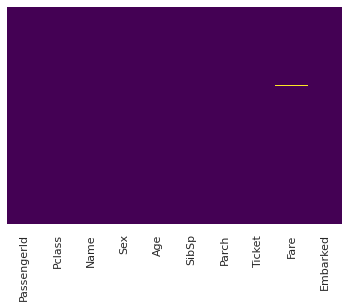

In [104]:
sns.heatmap(data.isnull(),cbar=False, cmap='viridis',yticklabels=False)

In [109]:
data['Fare'].mean()

35.627188489208635

In [110]:
def removeNanFare(Fare):
    if pd.isna(Fare):
        return 35.62
    else:
        return Fare

In [112]:
data['Fare'] = data['Fare'].apply(removeNanFare)

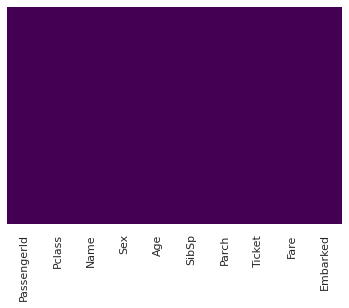

In [113]:
sns.heatmap(data.isnull(),cbar=False, cmap='viridis',yticklabels=False)

In [116]:
data['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [117]:
data.drop(columns=['PassengerId', 'Name', 'Ticket'],axis=1, inplace=True)

In [118]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [119]:
data = pd.get_dummies(data,drop_first=True)

In [120]:
data

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [121]:
data['Pclass'].unique()

array([3, 2, 1])

In [122]:
data = pd.get_dummies(data,columns=['Pclass'],drop_first=True)

In [123]:
data

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,25.0,0,0,8.0500,1,0,1,0,1
414,39.0,0,0,108.9000,0,0,0,0,0
415,38.5,0,0,7.2500,1,0,1,0,1
416,25.0,0,0,8.0500,1,0,1,0,1


In [124]:
dcorr = data.corr()

In [125]:
dcorr

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
Age,1.000000,-0.081019,-0.054992,0.345375,-0.003269,-0.067731,-0.098578,-0.037950,-0.423914
SibSp,-0.081019,1.000000,0.306895,0.171488,-0.099943,-0.098824,0.079367,-0.042418,0.018573
Parch,-0.054992,0.306895,1.000000,0.230001,-0.159120,-0.132948,0.092201,-0.026335,0.026719
Fare,0.345375,0.171488,0.230001,1.000000,-0.191383,-0.155539,-0.178465,-0.128762,-0.431685
Sex_male,-0.003269,-0.099943,-0.159120,-0.191383,1.000000,-0.115574,0.105883,0.045655,0.072405
Embarked_Q,-0.067731,-0.098824,-0.132948,-0.155539,-0.115574,1.000000,-0.474962,-0.114588,0.260301
Embarked_S,-0.098578,0.079367,0.092201,-0.178465,0.105883,-0.474962,1.000000,0.215634,0.011883
Pclass_2,-0.037950,-0.042418,-0.026335,-0.128762,0.045655,-0.114588,0.215634,1.000000,-0.558487
Pclass_3,-0.423914,0.018573,0.026719,-0.431685,0.072405,0.260301,0.011883,-0.558487,1.000000


In [126]:
data['SibSp'].value_counts()

0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64

In [127]:
data['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [128]:
data = pd.get_dummies(data,columns=['Parch','SibSp'],drop_first=True)

In [129]:
data

,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8
0,34.5,7.8292,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,47.0,7.0000,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,62.0,9.6875,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,27.0,8.6625,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22.0,12.2875,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,25.0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
414,39.0,108.9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
415,38.5,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
416,25.0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
data.to_csv('processedTitanicTest.csv',index=False)